[ 18  29  42  53  64  74  85  98 109]
ROW/COL:  0 0
[ 18  29  42  53  64  74  85  98 109]
ROW/COL:  1 0
[ 18  29  42  53  63  74  85  98 109]
ROW/COL:  0 1
[ 18  29  42  53  63  74  85  98 109]
ROW/COL:  1 1
[ 18  29  42  53  63  74  85  98 109]
ROW/COL:  0 2
[ 18  29  42  53  63  74  85  98 109]
ROW/COL:  1 2
[ 18  29  42  53  63  74  85  98 109]
ROW/COL:  0 3
[ 18  29  42  53  63  74  85  98 109]
ROW/COL:  1 3


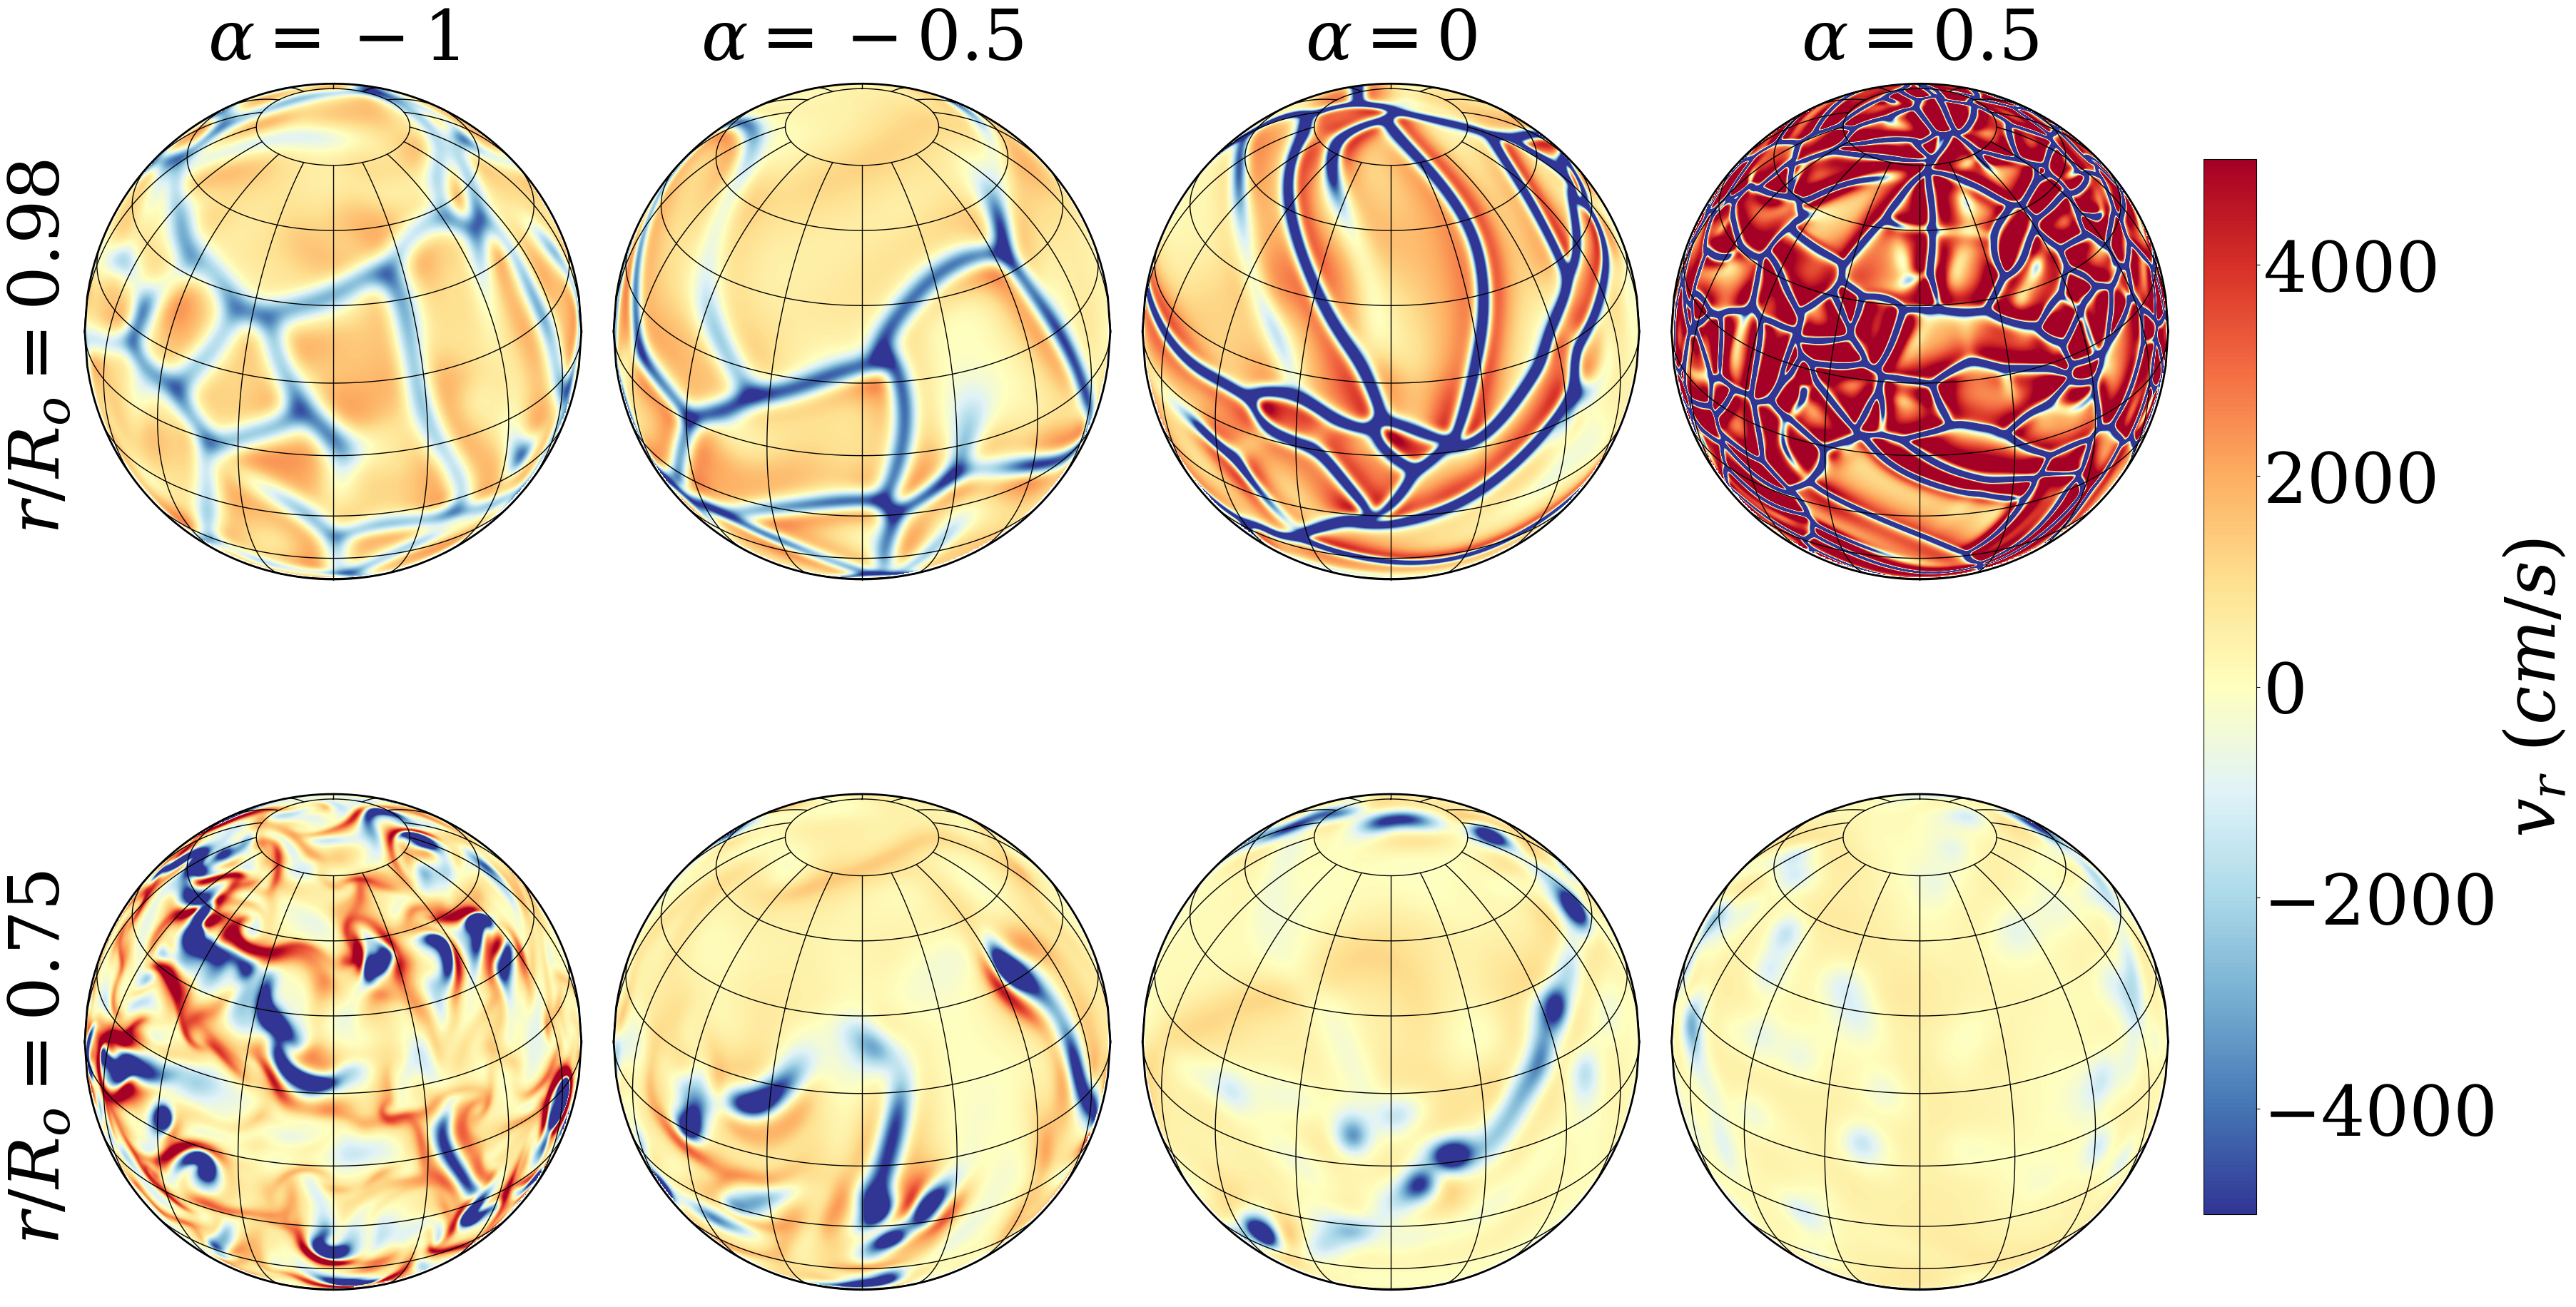

In [1]:
from reference_tools import equation_coefficients
from rayleigh_diagnostics import G_Avgs, Shell_Slices, Shell_Avgs
import survey_utilities as su
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec, colorbar, colors, cm

from scipy.optimize import curve_fit
from projection import plot_ortho



##############################AA
# Specify a shell_slices file
#shell_file='../Rayleigh_Data/Shell_Slices/ss_9'
shell_path=''

shell_files = ['../NR_project1/Shell_Slices/Shell_Slices/ss_17', '../NR_project1/Shell_Slices/Shell_Slices/ss_10', '../NR_project1/Shell_Slices/Shell_Slices/ss_3','../NR_project1/Shell_Slices/Shell_Slices/ss_22']
##############################################
# Set some basic image parameters
pltin = 9  # Size of each subimage in inches (will be square)
tsize = 16  # The font size to use
img_file = 'models_3_10_17_22.pdf'

##############################################
# Specify the data variable and radius we want to view
qi =  1 # [1, 3, 501, 301]       # vr, vphi, S, radial vorticity

# Plot title.  For latex code, place an 'r' in front of the string value
ptitle = [r'$\alpha = -1$', r'$\alpha = -0.5$', r'$\alpha = 0$', r'$\alpha = 0.5$']

lv = [0, 8]      # The level from the shell_slices file to plot.
              # Suppose we output shell levels [16,32,64,96]
              # lv = 0 corresponds to level 16 from the simulation
              # lv = 2 corresponds to 64, etc.
            
#############################################
# Fine tune the image appearance
cmap = "RdYlBu_r"   # The color map to use.  Default is RdYlBu (no '_r')
scale_factor = 2.0  # Increase/decrease to increase/decrease image saturation
ltcen= 30            # The central latitude from which to view the shell (positive is northern hemisphere)
longcen= 40            

###############################################
# Probably no need to modify code from here on down
nrow=2
ncol=4
fig = plt.figure(constrained_layout=True, figsize=(pltin*ncol,pltin*nrow*1.1))
spec = gridspec.GridSpec(ncols=ncol, nrows=nrow, figure=fig, height_ratios=[1, 1], width_ratios=[0.1]*ncol)



plt.rcParams.update({'font.size': tsize})
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
#s1=Shell_Slices(shell_file,path=shell_path)
#data = numpy.zeros((s1.nphi,s1.ntheta),dtype='float64')
#costheta = s1.costheta
axes = []



for j in range(ncol):
    for i in range(nrow):

        s1=Shell_Slices(shell_files[j],path=shell_path)
        data = np.zeros((s1.nphi,s1.ntheta),dtype='float64')
        costheta = s1.costheta

        data[:,:] = s1.vals[:,:,lv[i],s1.lut[qi],0]    
        print(s1.inds)
        row_ind = 1*i # skip over space allowed for color bars
        col_ind = j

        print("ROW/COL: ", row_ind, col_ind)
        ax    = fig.add_subplot(spec[row_ind,col_ind])
        cspec = spec[row_ind,col_ind]
        caxis=None
        plot_ortho(data,s1.costheta, fig, ax, caxis, colormap=cmap,
                   latcen = ltcen, scale_type = ['force', [-5000, 5000]]) #scale_factor])
        if i == 0:
            ax.set_title(ptitle[j], fontsize = 70)


        if (i == 0) & (j == 0):
            ax.text(-80, 450, r'$r/R_o = 0.98$', rotation = 90, fontsize = 70)
        if (i == 1) & (j == 0):
            ax.text(-80, 450, r'$r/R_o = 0.75$', rotation = 90, fontsize = 70)


        if j == 3:
            axes.append(ax)
        
        #ptitle=nm[j]+"   (r_index = "+str(lv[j])+")"
        #ax.set_title(ptitle)
        #plt.clim(-10000, 10000)
        #fig.colorbar(ax, vmin = -10000, vmax = 10000)


#Create colorbar and axes for colorbar
cmap = plt.cm.RdYlBu_r

#Change the vmin and vmax values to change the limits of the colorbar
norm = colors.Normalize(vmin=-5000, vmax=5000)
cax, kw = colorbar.make_axes(axes, shrink = 0.75, pad = 0.05)


cbar = fig.colorbar(cm.ScalarMappable(norm = norm, cmap = cmap), cax = cax)
cbar.ax.tick_params(labelsize=70)
cbar.set_label(label = r'$v_r~(cm/s)$', fontsize = 70)


plt.savefig(img_file, bbox_inches = 'tight', dpi = 300)

